# THE BATTLE OF THE NEIGHBOURHOODS

## INTRODUCTION


In [1]:
import numpy as np 
import pandas as pd
!pip install folium
import folium
!pip install geopy
from geopy.geocoders import Nominatim 
!pip install lxml 
import requests
import lxml.html as lh
from sklearn.cluster import KMeans
print("Libraries imported.")

     |████████████████████████████████| 94 kB 5.2 MB/s  eta 0:00:01
Libraries imported.


In [2]:
url='http://thawnpi.blogspot.com/2014/08/post-code-zip-code-for-yangon.html'
data = requests.get(url)
dc = lh.fromstring(data.content)
tr = dc.xpath('//tr')
formatted = requests.get(url)
col=[]

i=0
for t in tr[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))

size_of_col = 3
for j in range(1,len(tr)):
    T=tr[j]
    if len(T)!=size_of_col:
        break
    
    i=0
    for t in T.iterchildren():
        da_ta=t.text_content() 
        if i>0:
            try:
                da_ta=int(data)
            except:
                pass
        col[i][1].append(da_ta)
        i+=1

        
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)
df

1:"Post Office"
2:"Township"
3:"Postal Code"


,Post Office,Township,Postal Code
0,Ahlone,Ahlone,11121
1,Aung San,Insein,11012
2,Bahan,Bahan,11201
3,Bayintnaung Market (Thamine),Mayangone,11062
4,Bogyoke Market,Pabedan,11143
5,Botahtaung,Botahtaung,11162
6,Botahtaung,Botahtaung,11161
7,Dagon,Dagon,11191
8,Dagon Myothit (North),Dagon Myothit (North),11421
9,Dagon Myothit (South),Dagon Myothit (South),11431


In [3]:
df["Latitude"] = ""
df["Longitude"] = ""
df.shape

(40, 5)

In [4]:
df.head()

,Post Office,Township,Postal Code,Latitude,Longitude
0,Ahlone,Ahlone,11121,,
1,Aung San,Insein,11012,,
2,Bahan,Bahan,11201,,
3,Bayintnaung Market (Thamine),Mayangone,11062,,
4,Bogyoke Market,Pabedan,11143,,


In [5]:
df1 = df.loc[0:25]
df2 = df.loc[26:39]

In [6]:
# Need to drop those Neighborhood that the geocode does not find
DropUnknown = []
geolocator = Nominatim(user_agent="ny_explorer")
for index, row in df1.iterrows():
    address = row['Post Office']
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        df1.loc[index, 'Latitude'] = latitude
        df1.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        DropUnknown.append(index)

The geograpical coordinate of Ahlone  are 16.786798, 96.1287706.


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


The geograpical coordinate of Aung San are 1.1806, 120.8271.
The geograpical coordinate of Bahan are 0.893889, 103.794444.
Cannot do: Bayintnaung Market (Thamine), will drop index: 3
The geograpical coordinate of Bogyoke Market are 16.6912458, 97.4263586.
The geograpical coordinate of Botahtaung are 16.76849045, 96.17197060000001.
The geograpical coordinate of Botahtaung are 16.76849045, 96.17197060000001.
The geograpical coordinate of Dagon are 38.344636, -120.9613296.
The geograpical coordinate of Dagon Myothit (North) are 16.878127, 96.2049125.
The geograpical coordinate of Dagon Myothit (South) are 16.8549236, 96.2232173.
The geograpical coordinate of Dawbon are 16.7826249, 96.1877755.
The geograpical coordinate of Hlaing are 16.8430511, 96.1234366.
The geograpical coordinate of Hlaing Thar Yar are 20.7792224, 96.9972144.
The geograpical coordinate of Insein are 16.8879884, 96.1066695.
The geograpical coordinate of Kaba Aye  are 16.85682865, 96.15449879750403.
The geograpical coord

In [7]:
geolocator = Nominatim(user_agent="ny_explorer2")
for index, row in df2.iterrows():
    address = row['Post Office']
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        df2.loc[index, 'Latitude'] = latitude
        df2.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        DropUnknown.append(index)

The geograpical coordinate of Pyi Thar Yar are 20.8988174, 95.88853.


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


The geograpical coordinate of Sanchaung are 16.8061661, 96.1321384.
The geograpical coordinate of Shwe Pyi Thar are 16.8791448, 96.0543574.
Cannot do: Shwepaukan, will drop index: 29
The geograpical coordinate of Tamwe are 5.609722, -8.508056.
The geograpical coordinate of Tanyin are -9.6247897, -77.1990023.
The geograpical coordinate of Thamine College are 16.8612679, 96.1145958.
The geograpical coordinate of Tharkayta are 16.783486349999997, 96.19548455785477.
The geograpical coordinate of Theingyi Market are 16.7755194, 96.1539594.
The geograpical coordinate of Thingangyun are 16.8319649, 96.1973169.
The geograpical coordinate of Thuwunna are 16.821398549999998, 96.18680156941.
The geograpical coordinate of Yangon are 16.7967129, 96.1609916.
The geograpical coordinate of Yangon Station are 17.127428, 96.2744315.
The geograpical coordinate of Yankin are 16.8375171, 96.1642915.


In [8]:
hi = df1.append(df2, ignore_index = True)
CleanDF = hi.drop(DropUnknown)

In [9]:
CleanDF.shape

(38, 5)

In [10]:
Unknown = df.loc[DropUnknown]
Unknown.head()
Unknown.reset_index(drop=True)

,Post Office,Township,Postal Code,Latitude,Longitude
0,Bayintnaung Market (Thamine),Mayangone,11062,,
1,Shwepaukan,Okkalapa (North),11032,,


In [11]:
Unknown.shape

(2, 5)

In [12]:
Unknown1 = Unknown.iloc[0:1]

In [13]:
DropUnknown2 = []
geolocator = Nominatim(user_agent="ny_explorer8")
for index, row in Unknown1.iterrows():
    address = str(row['Postal Code'])
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        Unknown1.loc[index, 'Latitude'] = latitude
        Unknown1.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        DropUnknown2.append(index)

The geograpical coordinate of 11062 are 25.043270131842387, 121.57920808356504.


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
DF2 = Unknown1
DF2

,Post Office,Township,Postal Code,Latitude,Longitude
3,Bayintnaung Market (Thamine),Mayangone,11062,25.0433,121.579


In [15]:
DF2['Latitude'].replace('', np.nan, inplace=True)
DF2.dropna(subset=['Latitude'], inplace=True)
DF2

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Post Office,Township,Postal Code,Latitude,Longitude
3,Bayintnaung Market (Thamine),Mayangone,11062,25.04327,121.579


In [16]:
LT = [['Shwepaukan','Okkalapa (North)',11032,16.9197,96.1686 ]]
DF3 = pd.DataFrame(list(LT),  columns =['Post Office','Township','Postal Code','Latitude','Longitude']) 
DF3

,Post Office,Township,Postal Code,Latitude,Longitude
0,Shwepaukan,Okkalapa (North),11032,16.9197,96.1686


In [17]:
clean_df2 = DF2.append(DF3, ignore_index = True)
clean_df2.shape

(2, 5)

In [18]:
Cleaned = CleanDF.append(clean_df2, ignore_index = True)
Cleaned.shape

(40, 5)

## Clean Dataframe Containing Longitude And Latitdude

In [19]:
Cleaned

,Post Office,Township,Postal Code,Latitude,Longitude
0,Ahlone,Ahlone,11121,16.7868,96.1288
1,Aung San,Insein,11012,1.1806,120.827
2,Bahan,Bahan,11201,0.893889,103.794
3,Bogyoke Market,Pabedan,11143,16.6912,97.4264
4,Botahtaung,Botahtaung,11162,16.7685,96.172
5,Botahtaung,Botahtaung,11161,16.7685,96.172
6,Dagon,Dagon,11191,38.3446,-120.961
7,Dagon Myothit (North),Dagon Myothit (North),11421,16.8781,96.2049
8,Dagon Myothit (South),Dagon Myothit (South),11431,16.8549,96.2232
9,Dawbon,Dawbon,11241,16.7826,96.1878


In [20]:
Cleaned.to_csv('YangonLatLong.csv')

## Visualization

In [21]:
address = 'Yangon'

geolocator = Nominatim(user_agent="ny_explorer8")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Yangon are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Yangon are 16.7967129, 96.1609916.


In [22]:
Yangon_Map = folium.Map(location=[latitude, longitude], zoom_start=12)
Cleaned.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]], 
                                              radius=10, popup=row['Township'], color='black',fill=True,fill_color='#bc5090',fill_opacity=0.9)
                                             .add_to(Yangon_Map), axis=1)
Yangon_Map

## Using Foursquare API to get the venues

In [23]:
import json 

from pandas.io.json import json_normalize

In [24]:

CLIENT_ID = 'TBCCZ44W12JT32BZGNIYLI0NHHQX3K1K1UZXA2MS3VVFR11W' # your Foursquare ID
CLIENT_SECRET = 'VDM3BJ45SBPMIAPNVMEGZPLPF4XTCZGPQHNB4ZRXKNL1SQVY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
Cleaned2 = Cleaned.copy()

Your credentails:
CLIENT_ID: TBCCZ44W12JT32BZGNIYLI0NHHQX3K1K1UZXA2MS3VVFR11W
CLIENT_SECRET:VDM3BJ45SBPMIAPNVMEGZPLPF4XTCZGPQHNB4ZRXKNL1SQVY


In [25]:
LIMIT = 100
radius = 750
for lat, long, postal, post, township in zip(Cleaned2['Latitude'], Cleaned2['Longitude'], Cleaned2['Postal Code'], Cleaned2['Post Office'], Cleaned2['Township']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,        CLIENT_SECRET,        VERSION,        lat,        long,        radius,         LIMIT)
url
    

'https://api.foursquare.com/v2/venues/explore?client_id=TBCCZ44W12JT32BZGNIYLI0NHHQX3K1K1UZXA2MS3VVFR11W&client_secret=VDM3BJ45SBPMIAPNVMEGZPLPF4XTCZGPQHNB4ZRXKNL1SQVY&v=20180605&ll=16.9197,96.1686&radius=750&limit=100'

In [26]:
def GetVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Township', 
                  'Township Latitude', 
                  'Township Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
VenuesData = GetVenues(names=Cleaned2['Township'],
                                   latitudes=Cleaned2['Latitude'],
                                   longitudes=Cleaned2['Longitude']
                                  )

Ahlone
Insein
Bahan
Pabedan
Botahtaung
Botahtaung
Dagon 
Dagon Myothit (North)
Dagon Myothit (South)
Dawbon
Hlaing
Hlaing Thar Yar 
Insein
Mayangone
Kamayut
Kyauk Tan
Kyauktada
Kyimyindaing
Lanmadaw
Mingalar Taung Nyunt
Mingalardon
Okkalapa (North)
Okkalapa (South)
Pabedan
Pazundaung
Yankin
Sanchaung
Shwe Pyi Thar
Tamwe 
Tanyin
Hlaing
Tharkayta
Pabedan
Thingangyun
Thingangyun
Yangon
Mingalar Taung Nyunt
Yankin
Mayangone
Okkalapa (North)


In [28]:
VenuesData.head()

,Township,Township Latitude,Township Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ahlone,16.786798,96.128771,Lotaya Restaurant,16.788886,96.127490,Restaurant
1,Ahlone,16.786798,96.128771,Apple Hotpot & Dim Sum,16.786116,96.130737,Dim Sum Restaurant
2,Ahlone,16.786798,96.128771,ေရြွနန္းေတာ္ မုန့္တီ,16.784361,96.132085,Noodle House
3,Ahlone,16.786798,96.128771,Hot Pot City @ Ahlone,16.788111,96.124719,Chinese Restaurant
4,Ahlone,16.786798,96.128771,Ahlone Railway Station,16.790524,96.131020,Platform


In [29]:
Counted = VenuesData.groupby('Township').count().reset_index()
Counted['Count'] = Counted['Venue']
Counted = Counted.drop(['Township Latitude', 'Township Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
Counted = Counted.sort_values('Count').reset_index(drop=True)
Counted.head()

,Township,Count
0,Shwe Pyi Thar,1
1,Okkalapa (South),1
2,Okkalapa (North),1
3,Insein,2
4,Yankin,3


## Barchart

In [30]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

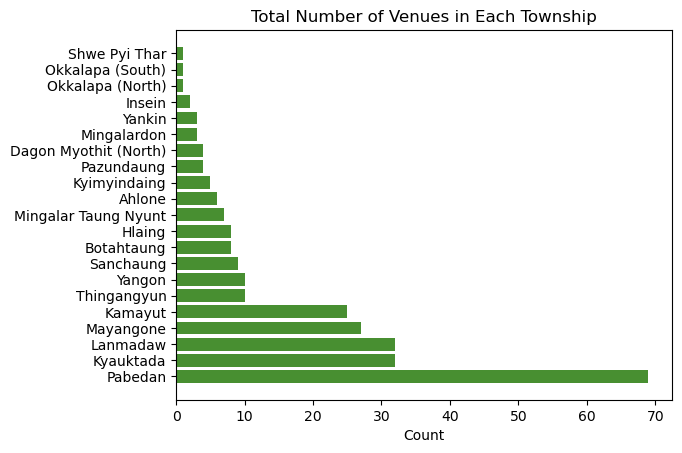

In [31]:
plt.rcdefaults()
fig, ax = plt.subplots()
objects = Counted.Township
y_pos = np.arange(len(objects))
performance = Counted.Count


ax.barh(y_pos, performance, align='center',color='#488f31')
ax.set_yticks(y_pos)
ax.set_yticklabels(objects)
ax.invert_yaxis() 
ax.set_xlabel('Count')
ax.set_title('Total Number of Venues in Each Township')


plt.show()

In [32]:
Hot = pd.get_dummies(VenuesData[['Venue Category']], prefix="", prefix_sep="")


Hot['Township'] = VenuesData['Township'] 


list_column = Hot.columns.tolist()
number_column = int(list_column.index('Township'))
list_column = [list_column[number_column]] + list_column[:number_column] + list_column[number_column+1:] 
Hot = Hot[list_column]

Hot.head()

,Township,Art Museum,Asian Restaurant,Australian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Bakery,Bar,Bed & Breakfast,...,Sushi Restaurant,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Train Station,Video Store,Waterfall,Zoo
0,Ahlone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ahlone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ahlone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ahlone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ahlone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
GroupedData = Hot.groupby('Township').mean().reset_index()
GroupedData.head()

,Township,Art Museum,Asian Restaurant,Australian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Bakery,Bar,Bed & Breakfast,...,Sushi Restaurant,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Train Station,Video Store,Waterfall,Zoo
0,Ahlone,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Botahtaung,0.0,0.0,0.25,0.0,0.0,0.000,0.0,0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dagon Myothit (North),0.0,0.0,0.00,0.0,0.0,0.250,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Hlaing,0.0,0.0,0.00,0.0,0.0,0.125,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Insein,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.00,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0


In [34]:
def return_most_common_venues(row, TopVenues):
    RowCategory = row.iloc[1:]
    RowCategorySort = RowCategory.sort_values(ascending=False)
    
    return RowCategorySort.index.values[0:TopVenues]


## Township  dataframe with the most common venue

In [95]:
TopVenueInterval = 1

indicators = ['st', 'nd', 'rd']


columns = ['Township']
for ind in np.arange(TopVenueInterval):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


TownshipSort = pd.DataFrame(columns=columns)
TownshipSort['Township'] = GroupedData['Township']

for ind in np.arange(GroupedData.shape[0]):
    TownshipSort.iloc[ind, 1:] = return_most_common_venues(GroupedData.iloc[ind, :], TopVenueInterval)

TownshipSort.head()

,Township,1st Most Common Venue
0,Ahlone,Restaurant
1,Botahtaung,Other Great Outdoors
2,Dagon Myothit (North),Spa
3,Hlaing,Platform
4,Insein,Train Station


## Township dataframe with the top 5 most common venues

In [96]:
TopVenueInterval = 5

indicators = ['st', 'nd', 'rd']


columns = ['Township']
for ind in np.arange(TopVenueInterval):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


CTownshipSort = pd.DataFrame(columns=columns)
CTownshipSort['Township'] = GroupedData['Township']

for ind in np.arange(GroupedData.shape[0]):
    CTownshipSort.iloc[ind, 1:] = return_most_common_venues(GroupedData.iloc[ind, :], TopVenueInterval)

CTownshipSort.head()

,Township,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Ahlone,Restaurant,Platform,Chinese Restaurant,Noodle House,Dim Sum Restaurant
1,Botahtaung,Other Great Outdoors,Australian Restaurant,Cruise Ship,Bar,Zoo
2,Dagon Myothit (North),Spa,Hotel,BBQ Joint,Zoo,Donut Shop
3,Hlaing,Platform,Café,BBQ Joint,Bus Station,Boarding House
4,Insein,Train Station,Tea Room,Zoo,Donut Shop,Clothing Store
